In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pollution_df = pd.read_csv("../Train.csv")
pollution_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather_df = pollution_df[['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground']]

weather_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559


### Precipitation

<AxesSubplot:>

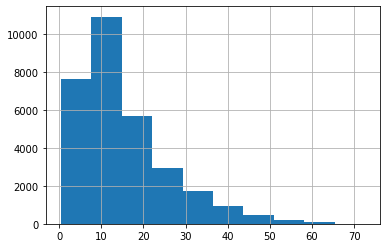

In [4]:
weather_df['precipitable_water_entire_atmosphere'].hist()

In [26]:
precipitation_placeid_df = weather_df.groupby('Place_ID').precipitable_water_entire_atmosphere.agg(['min','max','median','mean']).reset_index()

In [36]:
place_id = precipitation_placeid_df['Place_ID']

In [38]:
precipitation_mean = weather_df['precipitable_water_entire_atmosphere'].mean()
precipitation_min = weather_df['precipitable_water_entire_atmosphere'].min()
precipitation_max = weather_df['precipitable_water_entire_atmosphere'].max()
precipitation_median = weather_df['precipitable_water_entire_atmosphere'].median()


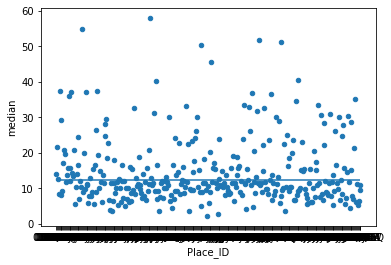

In [40]:
precipitation_placeid_df.plot(kind='scatter',x='Place_ID',y='median')
plt.hlines(y=precipitation_median,xmin=place_id.iloc[0],xmax=place_id.iloc[-1])

### Humidity

<AxesSubplot:>

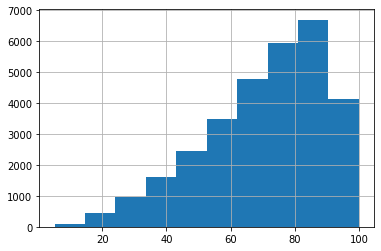

In [5]:
weather_df['relative_humidity_2m_above_ground'].hist()

<AxesSubplot:>

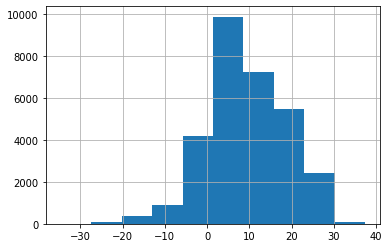

In [6]:
weather_df['temperature_2m_above_ground'].hist()

<AxesSubplot:>

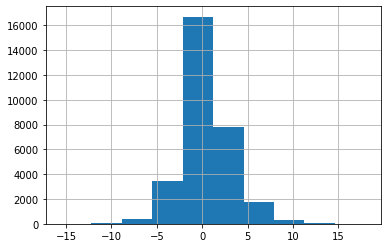

In [7]:
weather_df['u_component_of_wind_10m_above_ground'].hist()

<AxesSubplot:>

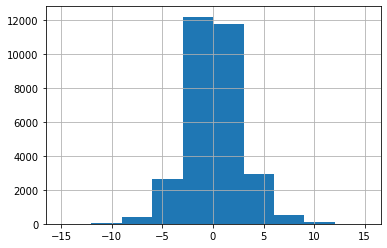

In [8]:
weather_df['v_component_of_wind_10m_above_ground'].hist()